In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [6]:
df.shape

(3803, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [8]:
df.duplicated().sum()

126

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

# Property type

<Axes: xlabel='property_type'>

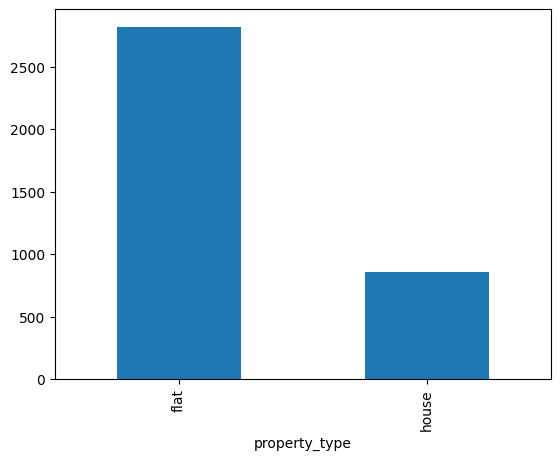

In [11]:
df['property_type'].value_counts().plot(kind= 'bar')

In [12]:
#Observations
#Flats are in majority(75 percent) and there are less number of houses(~25 percent)
#No missing values

# Society

In [13]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [14]:
df[df['society']!= 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [15]:
df['society'].isnull().sum()

1

In [16]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [17]:
#Top 10 society without the independent

<Axes: xlabel='society'>

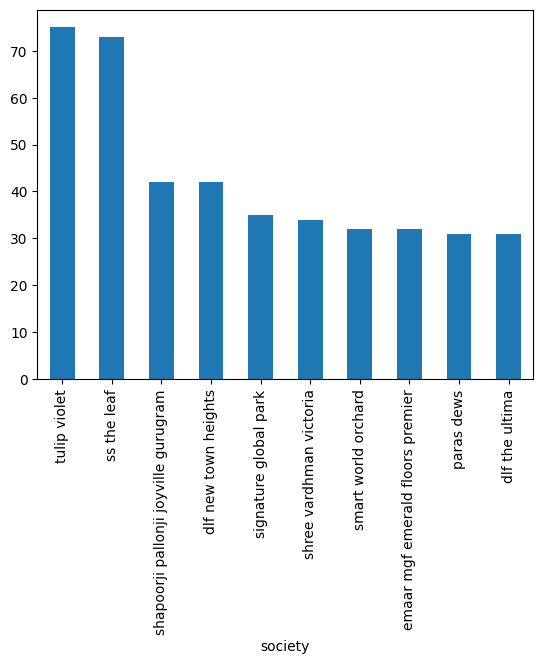

In [18]:
df[df['society']!= 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [19]:
#Frequency distribution of the society

In [20]:
society_counts = df['society'].value_counts()

In [21]:
frequency_bin = {
    "Very High>100": (society_counts >100).sum(),
    "High (50-100)": ((society_counts>= 50)& (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bin


{'Very High>100': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

### Sector

In [25]:
df['sector'].value_counts().shape

(104,)

<Axes: xlabel='sector'>

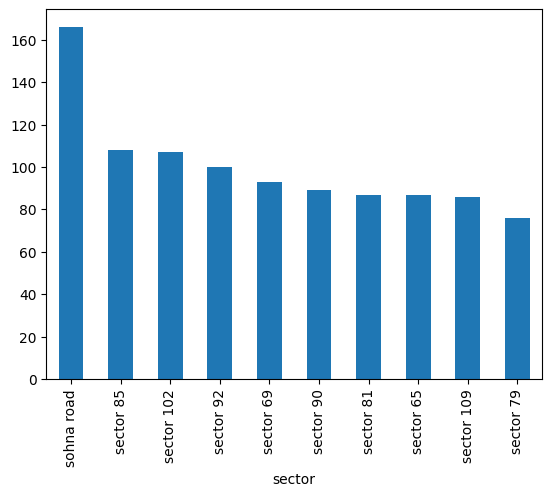

In [26]:
#Top 10 sector
df['sector'].value_counts().head(10).plot(kind='bar')

In [27]:
#Frequency distribution of the sector

In [28]:
sector_counts= df['sector'].value_counts()

In [37]:
sector_frequency_bin = {
    'Very High>100': (sector_counts >100).sum(),
    'High(50-100)': ((sector_counts>= 50)& (sector_counts<= 100)).sum(),
    'Average(10-49)' : ((sector_counts >=10) & (sector_counts <50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()

}

In [38]:
sector_frequency_bin

{'Very High>100': 3,
 'High(50-100)': 25,
 'Average(10-49)': 60,
 'Low (2-9)': 16,
 'Very Low (1)': 0}

### Price

In [42]:
df['price'].isnull().sum()

17

In [43]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

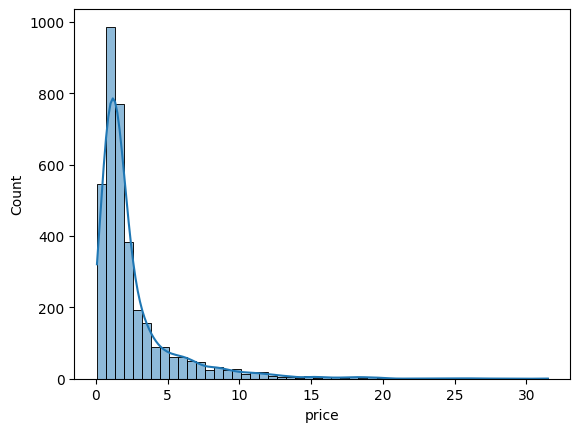

In [44]:
sns.histplot(df['price'], kde = True, bins = 50)

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

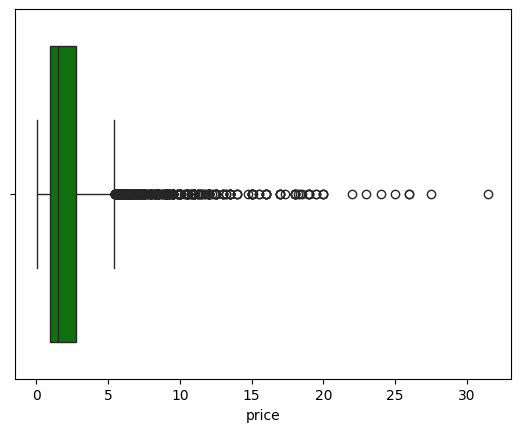

In [46]:
sns.boxplot(x =df['price'],color = 'green')
plt.grid

In [47]:
# REmoving the outlier

In [48]:
#Skewness and the kurtosis 

In [49]:
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

In [50]:
print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


In [51]:
#Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

#Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [52]:
#Quantile analysis 

In [53]:
quantile = df['price'].quantile([0.01,0.05,0.95,0.99])

In [54]:
quantile

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

In [55]:
#Identify the potential identifier using the IQR method

In [56]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

IQR = Q3- Q1

In [57]:
IQR

1.8

In [58]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(lower_bound,upper_bound)

-1.7500000000000002 5.45


In [61]:
outlier = df[( df['price'] <lower_bound) | (df['price'] > upper_bound)]

In [62]:
outlier.shape

(425, 23)

In [63]:
outlier['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [64]:
#Comparing distribution using the log transform

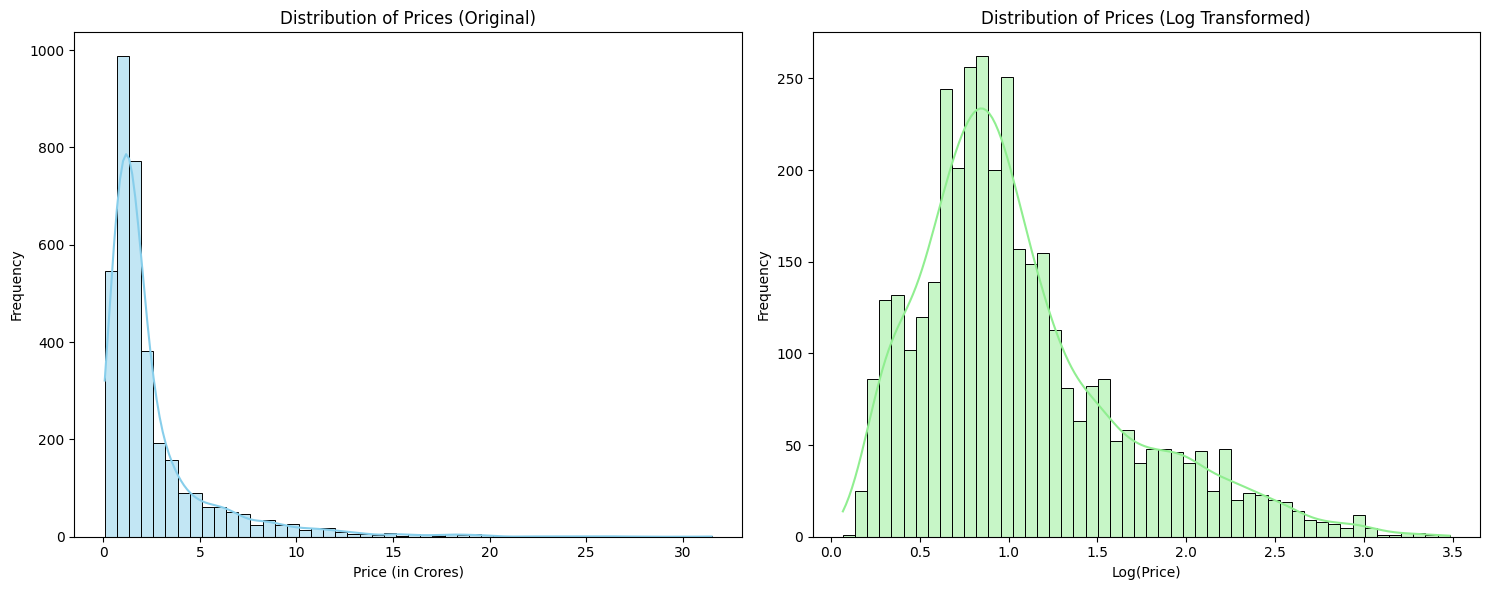

In [67]:
plt.figure(figsize=(15,6))

#Distribution without the log transform 
plt.subplot(1,2,1)
sns.histplot(df['price'],bins = 50,kde = True,color = 'skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

#Distribution using the log transform
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),bins = 50,kde=True, color = 'lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [69]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

In [70]:
print(skewness , kurtosis)

1.0740709565255315 0.9646692415449296


In [71]:
#Distribution of the Boxplot using the log transform

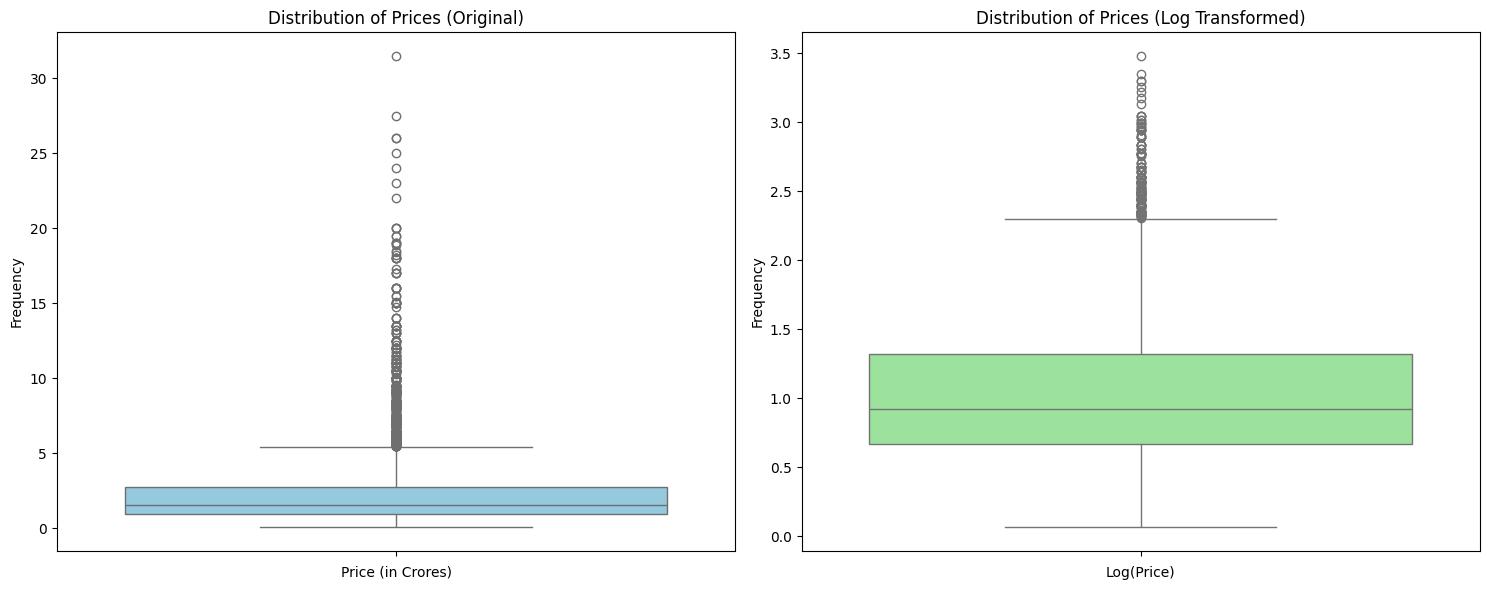

In [73]:
plt.figure(figsize= (15,6))

#Distribution of the plot with log transform
plt.subplot(1,2,1)
sns.boxplot(df['price'], color = 'skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

#Distribution with using the log transform
plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']), color = 'lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Price_per_sqrt

In [74]:
df['price_per_sqft'].isnull().sum()

17

In [75]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

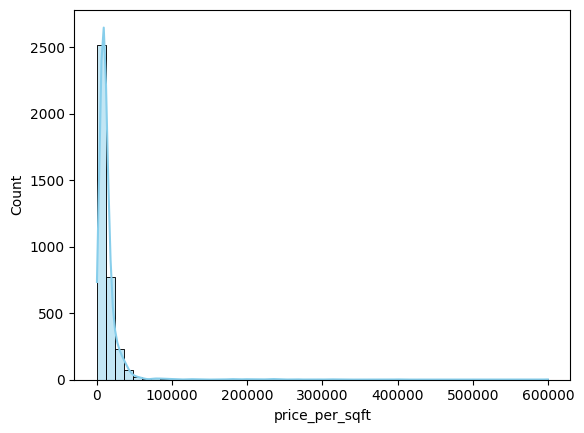

In [77]:
sns.histplot(df['price_per_sqft'],kde = True, bins =50, color = 'skyblue')

In [78]:
#Boxplot 

<Axes: ylabel='price_per_sqft'>

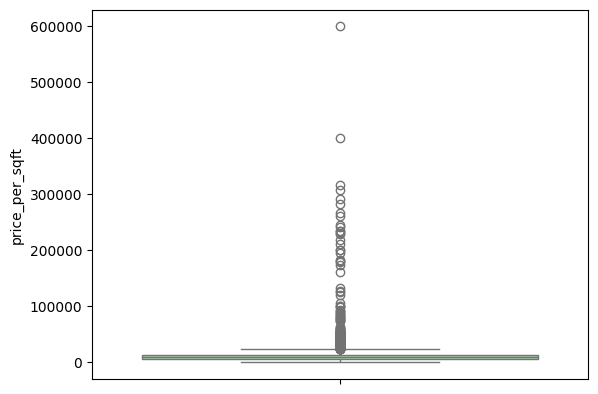

In [79]:
sns.boxplot(df['price_per_sqft'],color = 'lightgreen')

### bedroom 

In [80]:
df['bedRoom'].isnull().sum()

0

In [81]:
df['bedRoom'].describe()

count    3677.000000
mean        3.360076
std         1.897629
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

<Axes: ylabel='proportion'>

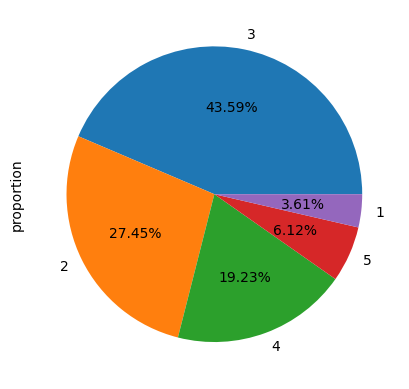

In [88]:
df['bedRoom'].value_counts(normalize = True).head().plot(kind = 'pie', autopct = '%0.2f%%')

### Bathroom

In [89]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

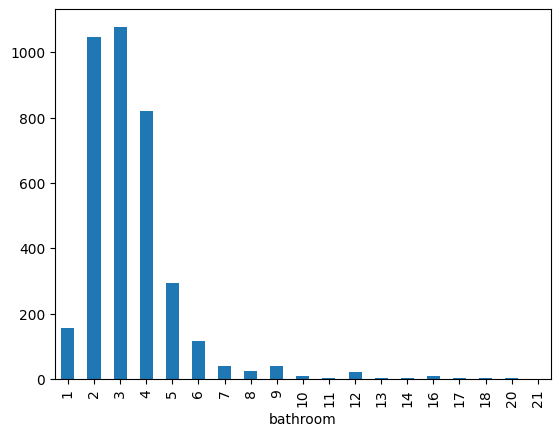

In [92]:
df['bathroom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

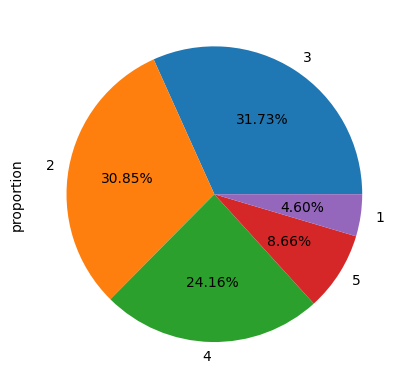

In [101]:
df['bathroom'].value_counts(normalize = True).head().plot(kind = 'pie',autopct = '%0.2f%%')

### balcony 

In [102]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

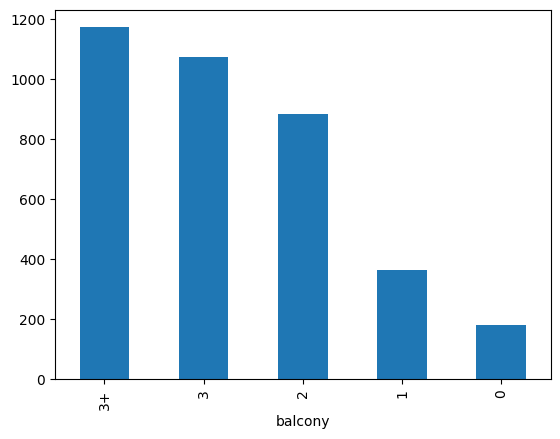

In [105]:
df['balcony'].value_counts().plot(kind = 'bar')

<Axes: ylabel='proportion'>

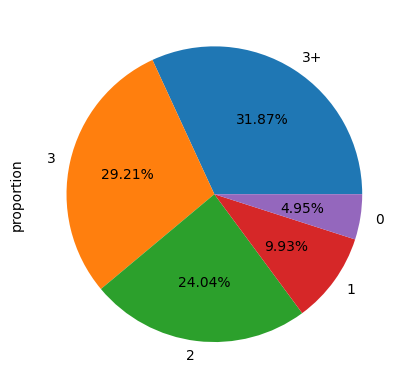

In [108]:
df['balcony'].value_counts(normalize=True).head().plot(kind = 'pie',autopct = '%0.2f%%')

### Floornum

In [110]:
df['floorNum'].isnull().sum()

19

In [111]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

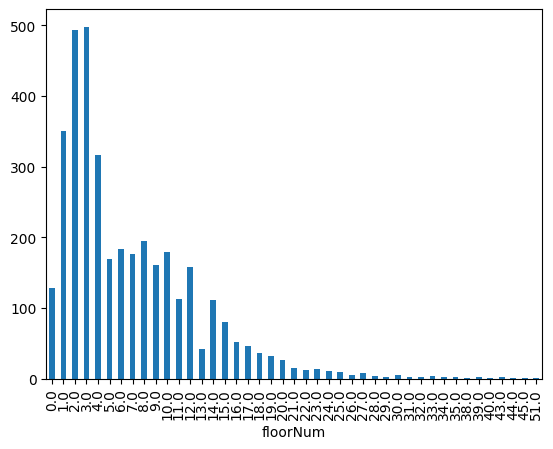

In [112]:
df['floorNum'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='floorNum'>

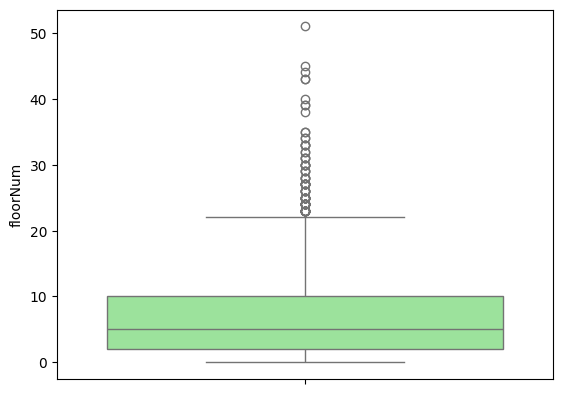

In [114]:
sns.boxplot(df['floorNum'],color= 'lightgreen')

### Facing 

In [115]:
df['facing'].isnull().sum()

1045

In [117]:
df['facing'].fillna('NA',inplace = True)

C:\Users\MB511WS\AppData\Local\Temp\ipykernel_9500\774203886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace = True)


In [119]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### ageprocession

In [120]:
df['agePossession'].isnull().sum()

0

In [121]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

### area

In [122]:
df['super_built_up_area'].isnull().sum()

1802

In [124]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

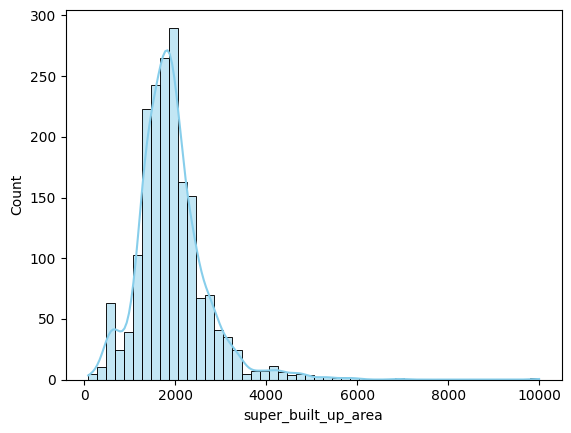

In [127]:
sns.histplot(df['super_built_up_area'].dropna(),bins = 50, color = 'skyblue', kde = True)

<Axes: ylabel='super_built_up_area'>

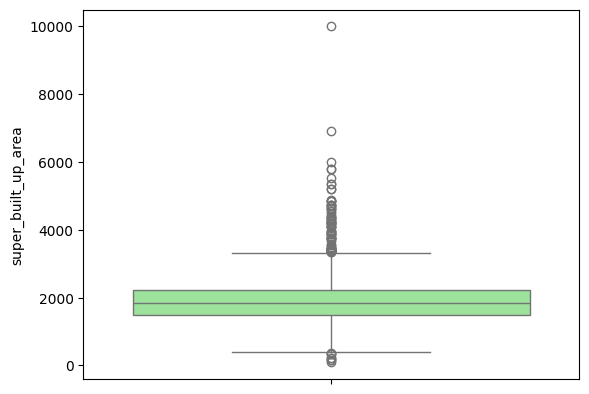

In [128]:
sns.boxplot(df['super_built_up_area'].dropna(),color = 'lightgreen')

### CArpet arae

In [129]:
df['carpet_area'].isnull().sum()

1805

In [130]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

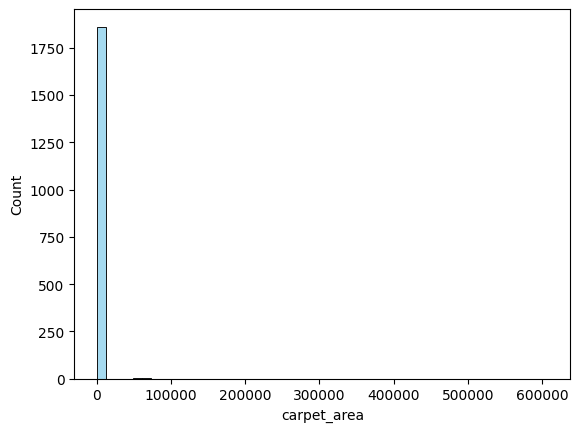

In [132]:
sns.histplot(df['carpet_area'].dropna() ,bins = 50 ,color = 'skyblue', kde= False)

<Axes: ylabel='carpet_area'>

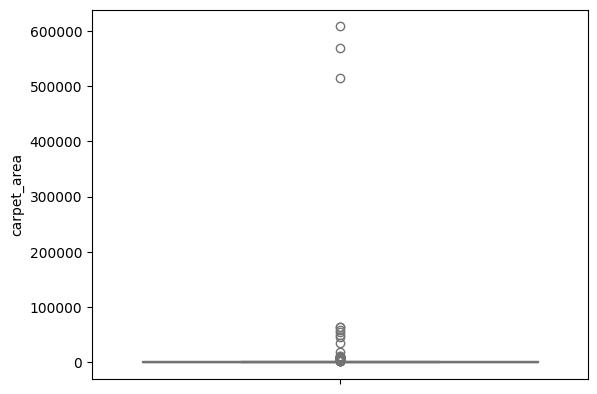

In [133]:
sns.boxplot(df['carpet_area'].dropna(),color = 'lightgreen')

### Furnishing type

In [134]:
df['furnishing_type'].isnull().sum()

0

<Axes: ylabel='count'>

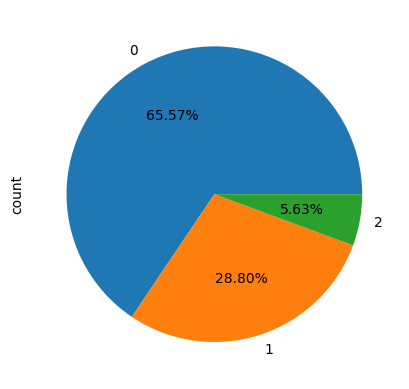

In [137]:

df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### Luxury score

In [138]:
df['luxury_score'].isnull().sum()

0

In [139]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

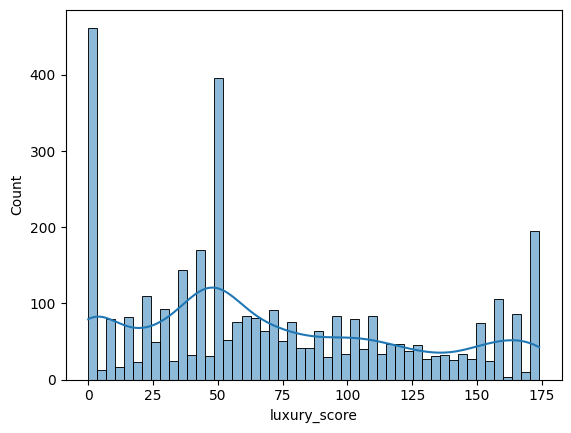

In [140]:
sns.histplot(df['luxury_score'],kde=True , bins= 50)

<Axes: ylabel='luxury_score'>

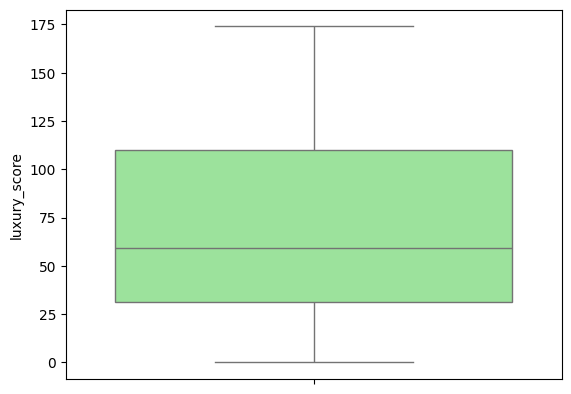

In [141]:
sns.boxplot(df['luxury_score'], color='lightgreen')